In [2]:
import pandas as pd

In [186]:
# Fetching our data
data = pd.read_csv("data/train.csv")


data.head()
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
# Train and test splitting
from sklearn.model_selection import train_test_split

columns = ["Sex", "Age", "SibSp", "Parch", "Pclass"]

categorical_features = [col for col in columns if data[col].dtype == 'object']
numerical_features = [col for col in columns if col not in categorical_features]

def load_data(data):
    X = data[columns]
    y = data.Survived
    return X, y

X, y = load_data(data)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [171]:
# Building our preprocessing Stuff

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder, StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

# Define transformer for Numerical Data
numerical_transformer = Pipeline([
    ("imp", SimpleImputer()),  # fill missing values
    ("scale", StandardScaler())  # normalise data
])

# Define transformer for categorical data
encoder = OrdinalEncoder()

# Define our preprocessor as Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", encoder, categorical_features)
    ]
)


In [172]:
# determine the best value for n_estimators
from sklearn.model_selection import cross_val_score

def score_estimators(n_estimators: int):
    
    classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=0)


    model = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    return cross_val_score(model, X_valid, y_valid, cv=4, scoring='accuracy').mean()


tuning_n_estimators = {x: score_estimators(x) for x in range(50, 550, 50)}

n_estimators = max(parameters, key=lambda x: tuning_n_estimators[x])


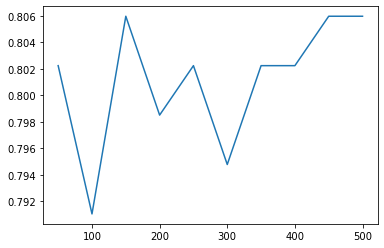

In [173]:
import matplotlib.pyplot as plt

plt.plot(tuning_n_estimators.keys(), tuning_n_estimators.values())

In [176]:
# Building our model
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=0)


model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", classifier)
])

model.fit(X_train, y_train)
model.score(X_valid, y_valid)

0.8134328358208955

In [185]:
test_data = pd.read_csv("data/test.csv")

predictions = model.predict(test_data[columns])

out = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

out.head()

with open("data/my_submission.csv", "w") as f:
    f.write(out.to_csv(index=False))

f.close()